In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']

df = pd.read_csv('C:/Users/Harsh Yadav/Desktop/datamerged.csv',encoding="ISO-8859-1")

In [2]:
df.head(5)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1


In [3]:
#deleting the unnecessary fields
del df['id']
del df ['id_str']
del df['created_at']
del df['lang']

df.name=df.name.str.len()

df.location=df.location.str.len()
df.location = df.location.replace('1', '0', regex=True)

df.description=df.description.str.len()
df.description = df.description.replace('1', '0', regex=True)

df.status=df.status.str.len()
df.status = df.status.replace('1', '0', regex=True)

df.url=df.url.str.len()
df.url = df.url.replace('1', '0', regex=True)

df.screen_name=df.screen_name.str.len()

df.followers_count=(df.statuses_count)/(df.followers_count)
df.statuses_count=(df.statuses_count)*(df.followers_count)

df=df.replace(np.inf, '0')
df = df.replace(np.nan, '0', regex=True)

df.verified=df.verified.astype(int)
df.default_profile=df.default_profile.astype(int)
df.default_profile_image=df.default_profile_image.astype(int)
df.has_extended_profile = df['has_extended_profile'].fillna(False)
df.has_extended_profile = df.has_extended_profile.astype(int)

In [4]:
df.head(5)

,screen_name,location,description,url,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,12,0,91,0,20.8654,7,2,0,0,491525,730,0,0,0,12,1
1,8,0,0,0,0,22,0,0,0,0,2120,1,1,0,7,1
2,13,0,0,0,350,0,3,0,0,367500,716,1,0,0,8,1
3,12,13,101,22,10.1168,13,49,0,0,51686.9,787,0,0,0,13,1
4,11,0,16,0,2091,0,11,0,0,6.55842e+07,733,1,0,0,20,1


In [5]:
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(df.ix[:,0:15], df['bot'], test_size=0.2, random_state=0)

In [6]:
ydt_train.head(2)

1733    0
438     1
Name: bot, dtype: int64

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=650, oob_score=False)
clf.fit(Xdt_train, ydt_train)
predicted = clf.predict(Xdt_test)
from sklearn.metrics import accuracy_score
accuracy_score(ydt_test,predicted)

0.89261744966442957

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.metrics import *
print("Accuracy Score:", (accuracy_score(ydt_test,predicted )))
print("Precision Score: ", (precision_score(ydt_test,predicted,average='binary' )))
print("Recall Score: ", (recall_score(ydt_test,predicted,average='binary' )))
print("F1 Score: ", (f1_score(ydt_test,predicted,average='binary' )))

Accuracy Score: 0.892617449664
Precision Score:  0.915492957746
Recall Score:  0.866666666667
F1 Score:  0.890410958904


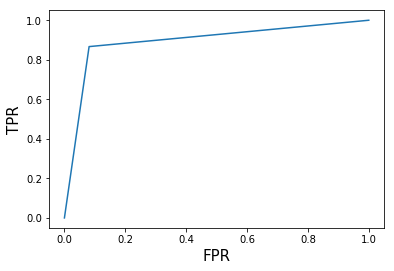

In [10]:
from sklearn import metrics
from sklearn.metrics import *
fpr, tpr, thresholds = metrics.roc_curve(ydt_test, predicted,pos_label=1)
fpr, tpr, thresholds = metrics.roc_curve(ydt_test, predicted,pos_label=1)
metrics.auc(fpr,tpr)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.plot(fpr,tpr)